#### Problem Statement 
Implement a prediction Model that can predict the price of the house.

In [1]:
## Import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Code for removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Upload or read the dataset 
dataset = pd.read_csv("data/dataset.csv")

In [4]:
## Read first five row of the dataset
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
## Basic datatypes and info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
## NO. of rows and columns
dataset.shape

(545, 13)

In [7]:
## Statistics of the dataset(numerical columns)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [8]:
## Check any missing value or empty cell is present or not
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### There is no missing value in the dataset

In [9]:
## Check any duplicate value present or not
dataset.duplicated().sum()

np.int64(0)

#### There is no dulicated value

In [10]:
dataset.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
## Categorical Features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
print("There are {} categorical features: {}".format(len(categorical_features),categorical_features))

There are 7 categorical features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [13]:
## Numerical Features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!="O"]
print("There are {} numerical features: {}".format(len(numerical_features),numerical_features))

There are 6 numerical features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [14]:
## Unique value in categorical Columns
for i in categorical_features:
    print("Unique value in {} column is : {}".format(i,dataset[i].unique()))

Unique value in mainroad column is : ['yes' 'no']
Unique value in guestroom column is : ['no' 'yes']
Unique value in basement column is : ['no' 'yes']
Unique value in hotwaterheating column is : ['no' 'yes']
Unique value in airconditioning column is : ['yes' 'no']
Unique value in prefarea column is : ['yes' 'no']
Unique value in furnishingstatus column is : ['furnished' 'semi-furnished' 'unfurnished']


In [15]:
##Value counts in categorical Columns
for i in categorical_features:
    print("Unique value in {} column is : {}".format(i,dataset[i].value_counts()))

Unique value in mainroad column is : mainroad
yes    468
no      77
Name: count, dtype: int64
Unique value in guestroom column is : guestroom
no     448
yes     97
Name: count, dtype: int64
Unique value in basement column is : basement
no     354
yes    191
Name: count, dtype: int64
Unique value in hotwaterheating column is : hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Unique value in airconditioning column is : airconditioning
no     373
yes    172
Name: count, dtype: int64
Unique value in prefarea column is : prefarea
no     417
yes    128
Name: count, dtype: int64
Unique value in furnishingstatus column is : furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


### Visualization

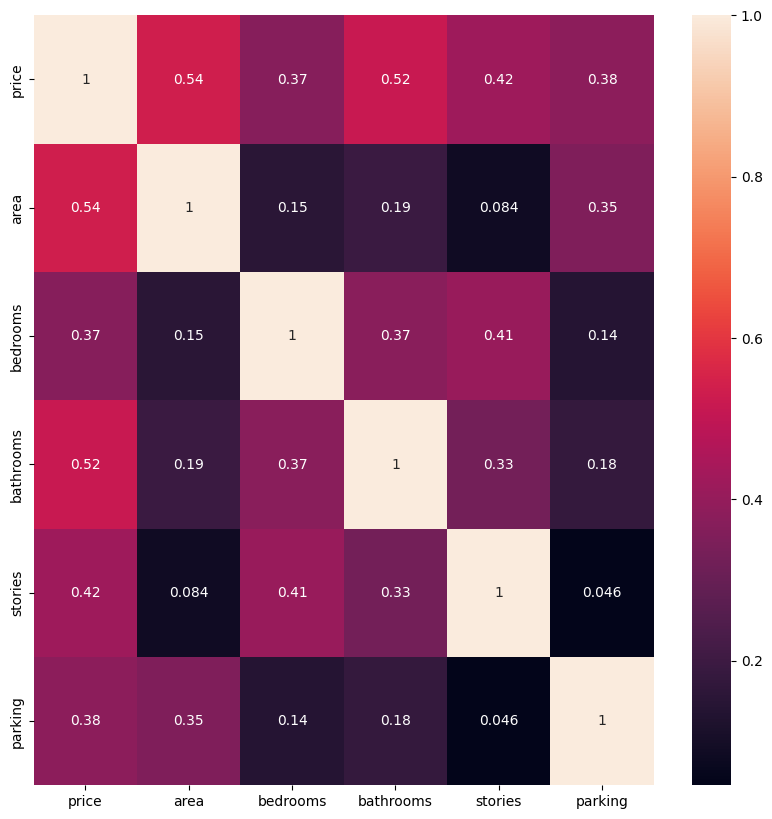

In [16]:
## Check correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset[numerical_features].corr(),annot=True)
plt.show()

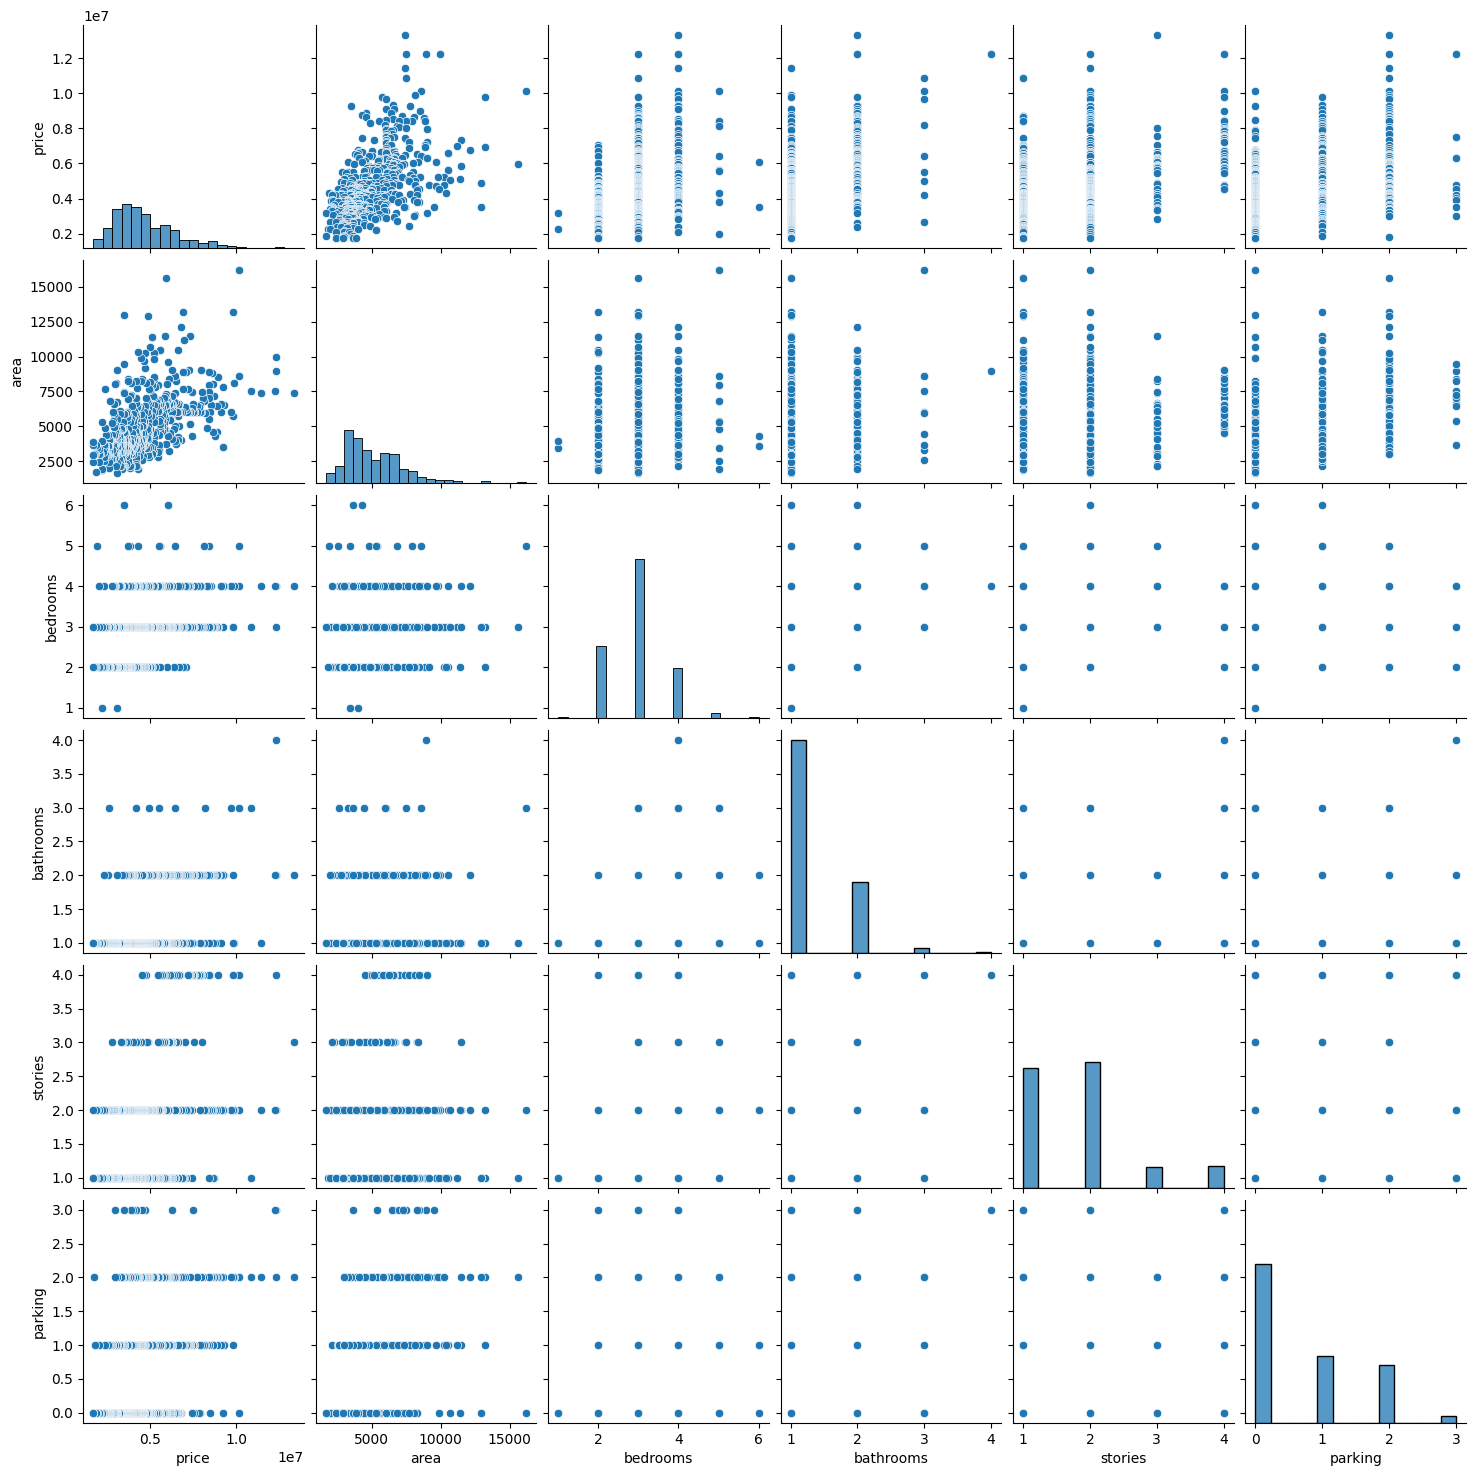

In [17]:
## See relation
sns.pairplot(dataset)
plt.show()

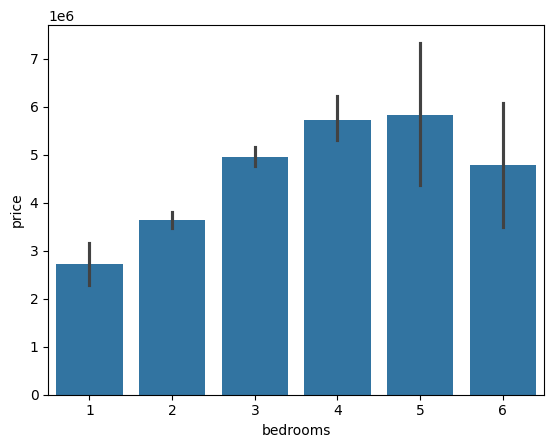

In [18]:
## See the relation between price and bedrooms
sns.barplot(x="bedrooms",y="price",data=dataset)
plt.show()

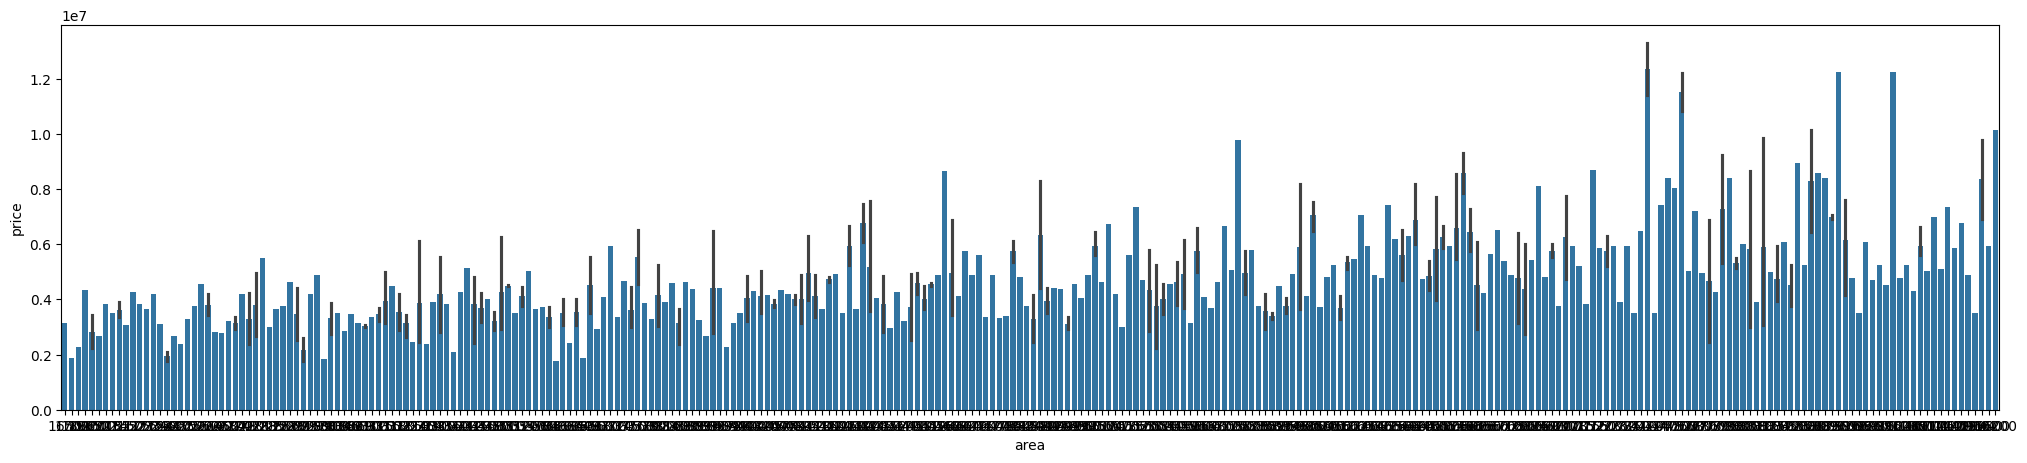

In [20]:
## See the relation between price and age_of_house
plt.figure(figsize=(25,5))
sns.barplot(x="area",y="price",data=dataset)
plt.show()